In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

# from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data_set = pd.read_csv("data/trn.csv", sep=',', header=0, low_memory=False)

In [3]:
data_set = pd.concat([data_set[data_set.y == 1].iloc[0:20000],data_set[data_set.y == 0].iloc[0:20000]])

In [4]:
data_set = data_set.sample(frac=1)

In [5]:
data_set = data_set.drop('INDEX', 1)
data_set = data_set.drop('Unnamed: 0', 1)

# encontra as variavies categoricas
for col in data_set.columns:
    if ((data_set[col].quantile() == 1.0) | (data_set[col].quantile() == 0.0)):
        data_set[col] = data_set[col].astype('category')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data_set.loc[:, data_set.columns !='y']
y = data_set.iloc[:, data_set.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42, stratify=y)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42, stratify=y_train)

In [8]:
from sklearn import svm

Primeiro usando Kernel SVM com kernel do tipo rbf

In [9]:
#testando svm kernel rbf
clf = svm.SVC(gamma=0.1000000000000001, C=100.0, probability = True, random_state=201, verbose=True)
clf.fit(X_train.values, y_train.values.ravel())

[LibSVM]

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1000000000000001,
  kernel='rbf', max_iter=-1, probability=True, random_state=201,
  shrinking=True, tol=0.001, verbose=True)

In [18]:
predited = clf.predict(X_test.values)
y_pred_clf = clf.predict_proba(X_test)[:, 1]

In [19]:
accuracy = accuracy_score(y_test.values, predited)
recall = recall_score(y_test.values, predited)
precision = precision_score(y_test.values, predited)
f1 = f1_score(y_test.values, predited)
aupr = average_precision_score(y_test.values, predited)

In [20]:
from scipy import stats

fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_clf, pos_label=1)
ks = stats.ks_2samp(y_test.iloc[:,0].values, y_pred_clf)
ks

Ks_2sampResult(statistic=0.5, pvalue=0.0)

In [21]:
print("Accuracy score: {:.3}".format(accuracy))
print("Recall score: {:.3}".format(recall))
print("Precision score: {:.3}".format(precision))
print("f1 score: {:.3}".format(f1))
print("Mean precison score: {:.3}".format(aupr))
print("KS: {:.3}".format(ks[0]))

Accuracy score: 0.583
Recall score: 0.575
Precision score: 0.584
f1 score: 0.58
Mean precison score: 0.548
KS: 0.5


,0,1
0,2953,2047
1,2123,2877


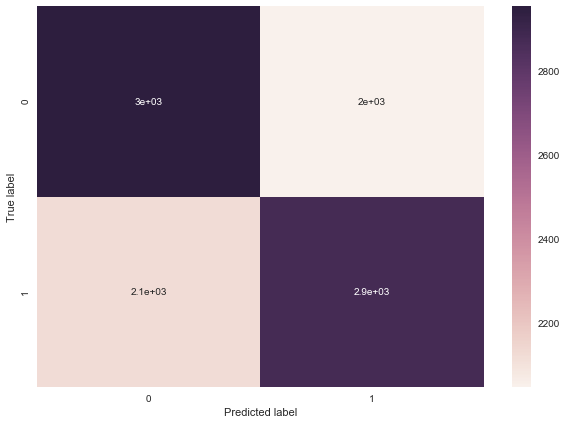

In [22]:
%matplotlib inline
cm = pd.DataFrame(confusion_matrix(y_test, predited))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
cm

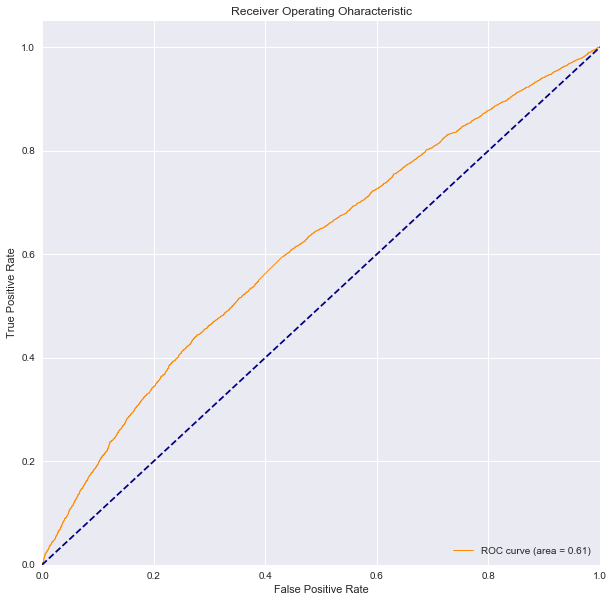

In [23]:
%matplotlib inline
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(tpr, fpr, color='darkblue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Oharacteristic')
plt.legend(loc="lower right")
plt.show()

ks:

Kernel do tipo linear e do tipo polinomial demoram mais de 12 horas para terminarem a execução. Códigos a seguir

In [ ]:
#kernel linear
linear_clf = svm.SVC(gamma=0.001, C=100., kernel='linear')
linear_clf.fit(X_train.values, y_train.values.ravel())

In [ ]:
linear_predited = linear_clf.predict(X_test.values)
linear_accuracy = accuracy_score(y_test.values, linear_predited)
print("Mean accuracy score: {:.3}".format(linear_accuracy))

In [ ]:
linear_cm = pd.DataFrame( confusion_matrix(y_test, linear_predited))
linear_fig = plt.figure(figsize=(10,7))
linear_heatmap = sns.heatmap(linear_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
linear_cm

In [ ]:
#kernel polinomial
poly_clf = svm.SVC(gamma=0.001, C=100., kernel='poly')
poly_clf.fit(X_train.values, y_train.values.ravel())

In [ ]:
poly_predited = poly_clf.predict(X_test.values)
poly_accuracy = accuracy_score(y_test.values, poly_predited)
print("Mean accuracy score: {:.3}".format(poly_accuracy))

In [ ]:
poly_cm = pd.DataFrame( confusion_matrix(y_test, poly_predited))
poly_fig = plt.figure(figsize=(10,7))
poly_heatmap = sns.heatmap(poly_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
poly_cm